In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("data.csv")

df.head()


,Feature1,Feature2,Feature3,Target
0,2,4,6,15
1,3,5,7,18
2,4,6,8,21
3,5,7,9,24
4,6,8,10,27


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

print(X.shape, y.shape)


(20, 3) (20, 1)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


In [7]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)


In [8]:
#Name:Mahasri D
#RegNo:212224220058
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super().__init__()

        self.fc1 = nn.Linear(input_size, 16)   # single hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)            # output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


model = NeuralNet(X_train.shape[1])
print(model)


NeuralNet(
  (fc1): Linear(in_features=3, out_features=16, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)


In [9]:
model = NeuralNet(X_train.shape[1])

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [10]:
#Name:Mahasri D
#RegNo:212224220058
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()

        outputs = ai_brain(X_train)
        loss = criterion(outputs, y_train)

        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 200 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

    return losses


In [11]:
losses = train_model(model, X_train, y_train, criterion, optimizer)


Epoch 0, Loss: 0.363239
Epoch 200, Loss: 0.000087
Epoch 400, Loss: 0.000001
Epoch 600, Loss: 0.000000
Epoch 800, Loss: 0.000000
Epoch 1000, Loss: 0.000000
Epoch 1200, Loss: 0.000000
Epoch 1400, Loss: 0.000000
Epoch 1600, Loss: 0.000000
Epoch 1800, Loss: 0.000000


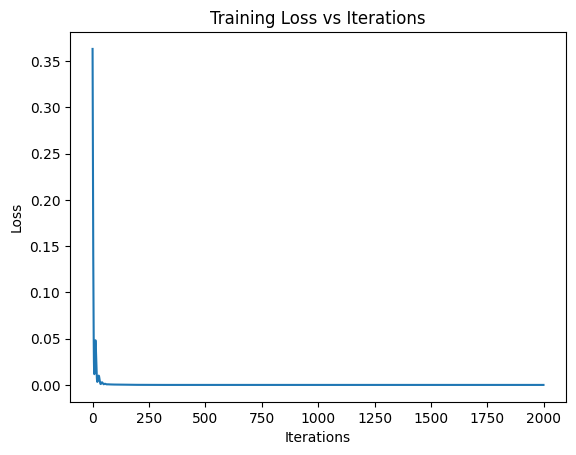

In [12]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss vs Iterations")
plt.show()


In [13]:
with torch.no_grad():
    preds = model(X_test)
    test_loss = criterion(preds, y_test)

print("Test Loss:", test_loss.item())


Test Loss: 0.0004674828960560262


In [14]:
sample = np.array([[12, 14, 16]])

sample_scaled = scaler_X.transform(sample)
sample_tensor = torch.FloatTensor(sample_scaled)

with torch.no_grad():
    prediction = model(sample_tensor)

prediction = scaler_y.inverse_transform(prediction.numpy())

print("Predicted value:", prediction)


Predicted value: [[44.999336]]
